#### Preprocessing

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

dataframe = pd.read_csv("UCI_Credit_Card.csv")

dataframe.head()
# dataframe.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [52]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

#### Dimension Reduction and Feature Selection

In [67]:
dataframe['SEX'] = dataframe['SEX'].astype(bool)
df1 = dataframe.copy()
subset = df1.head(n = 40)
subset.to_csv('subset_dataset.csv')
df1 = df1.drop(columns='ID')
rows, columns = df1.shape
for i in range(0, 29999, 1):
    df1.loc[df1['PAY_0'] < 0, 'PAY_0'] = 0
    df1.loc[df1['PAY_2'] < 0, 'PAY_2'] = 0
    df1.loc[df1['PAY_3'] < 0, 'PAY_3'] = 0
    df1.loc[df1['PAY_4'] < 0, 'PAY_4'] = 0
    df1.loc[df1['PAY_5'] < 0, 'PAY_5'] = 0
    df1.loc[df1['PAY_6'] < 0, 'PAY_6'] = 0

#taking average of the Payment and Bill Amounts
df1['PAY_AVG'] = (df1['PAY_AMT1'] + df1['PAY_AMT2'] + df1['PAY_AMT3'] + df1['PAY_AMT4'] + df1['PAY_AMT5'] + df1['PAY_AMT6']) / 6.0
df1['BILL_AVE'] = (df1['BILL_AMT1'] + df1['BILL_AMT2'] + df1['BILL_AMT3'] + df1['BILL_AMT4'] + df1['BILL_AMT5'] + df1['BILL_AMT6']) / 6.0

#droping Additional Columns as we have taken Average of both Pay and Bill
for col in ['BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']:
    df1 = df1.drop(columns=col)
for col in ['PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']:
    df1 = df1.drop(columns=col)


p = Rectangle(xy=(-0.25, 0), width=0.5, height=23364, angle=0)
p = Rectangle(xy=(0.75, 0), width=0.5, height=6636, angle=0)


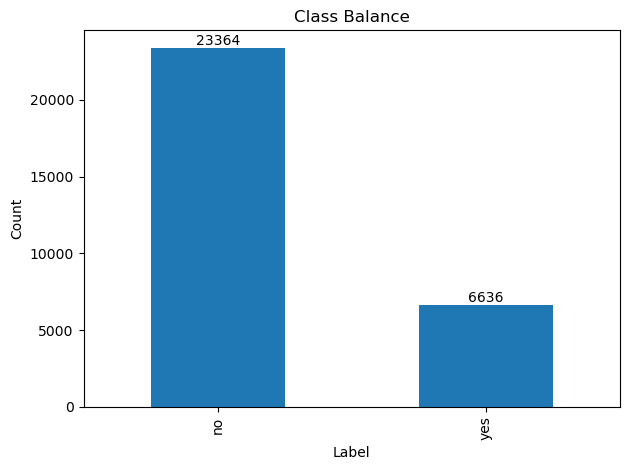

In [ ]:
Y_Predict = "default.payment.next.month"
ax = df1[Y_Predict].map({0: "no", 1: "yes"}).value_counts().sort_index().plot(kind="bar")
ax.set_title("Class Balance")
ax.set_xlabel("Label")
ax.set_ylabel("Count")
for p in ax.patches:
    print(f"p = {p}")
    ax.annotate(text= int(p.get_height()), xy=(p.get_x()+p.get_width()/2, p.get_height()), ha="center", va="bottom")

plt.tight_layout()
plt.show()

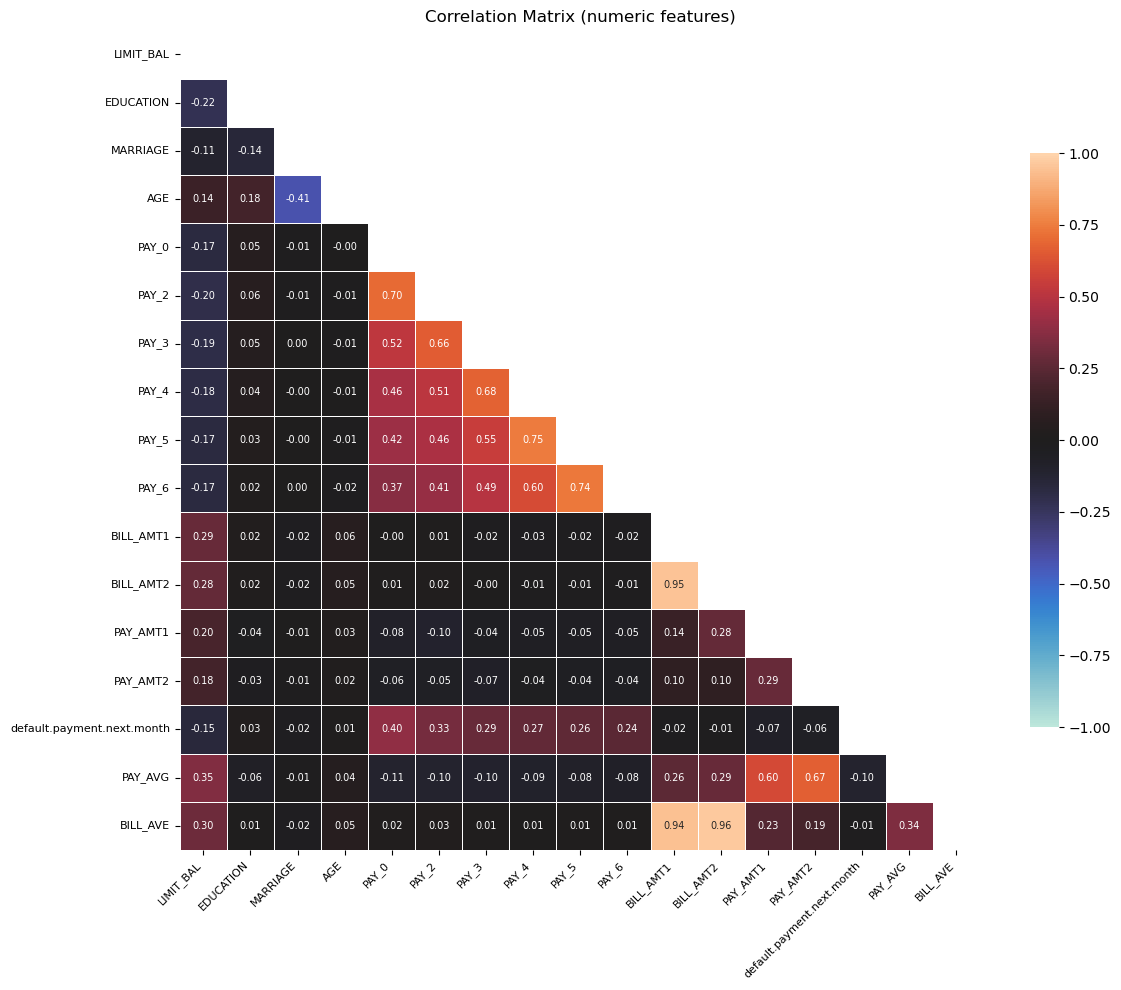

In [89]:
corr = df1.select_dtypes("number").corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr, mask=mask, annot=True, fmt=".2f",
    linewidths=0.5, linecolor="white",
    vmin=-1, vmax=1, center=0, square=False,
    cbar_kws={"shrink": 0.7}, annot_kws={"size": 7}
)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.title("Correlation Matrix (numeric features)")
plt.tight_layout()
plt.show()

In [117]:
df2 = df1.drop_duplicates()
Y = df2[Y_Predict]
X = df2.drop(columns=Y_Predict)

# Train Test split 
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)

print("Train:", X_train.shape, " Test:", X_test.shape)
print("Train ratio:", Y_train.value_counts(normalize=True).round(3).to_dict())
print("Test ratio:",  Y_test.value_counts(normalize=True).round(3).to_dict())
    

Train: (23952, 17)  Test: (5989, 17)
Train ratio: {0: 0.779, 1: 0.221}
Test ratio: {0: 0.779, 1: 0.221}


### Using different Classifier to check the accuracy for different models

In [ ]:
#Normalizing data for better Performance
#min-max normalization

#### Logistic Regression